In [44]:
#https://www.kaggle.com/code/prasadmeesala/breast-cancer-classification-1-0
import numpy as np
import os

# Import PySwarms
# import pyswarms as ps
# PySwarm Upgrade: scikit-opt
import sko
from sko.APSO import APSO

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.manifold import TSNE
import minisom

In [45]:
#Users/4lali/Downloads/
brain_data=pd.read_csv("Brain_GSE50161.csv")
# breast_data= pd.read_csv("Breast_GSE45827.csv")

# Preprocessing:  Breast Cancer data

In [50]:
breast_data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [51]:
breast_data=breast_data.dropna(axis=0, how='any')
breast_data.shape

(151, 54677)

In [52]:
# check missing values :
breast_data.isnull().values.any()

False

In [53]:
breast_data.iloc[:, :10].describe()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,160.668874,10.338901,7.631910,6.224885,7.339248,3.185252,7.310240,5.323484,4.714095
std,45.431226,0.613445,0.706464,0.645435,0.330827,0.158909,0.642091,0.294513,0.308550
min,84.000000,7.505488,5.855968,4.763602,6.632206,2.760583,5.455736,4.646131,3.946065
25%,121.500000,10.103030,7.166075,5.798087,7.105841,3.075873,6.874504,5.131931,4.466260
50%,159.000000,10.416819,7.531673,6.235074,7.333426,3.187703,7.417113,5.274663,4.662957
75%,200.500000,10.735117,8.053832,6.612291,7.513084,3.280416,7.760806,5.456686,4.941337
max,238.000000,11.675109,9.627008,8.364749,8.374055,3.611630,8.569296,6.360765,5.893006


In [54]:
breast_data.groupby("type").count()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
type,,,,,,,,,,,,,,,,,,,,,
HER,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
basal,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
cell_line,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
luminal_A,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
luminal_B,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
normal,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: type, dtype: int64 




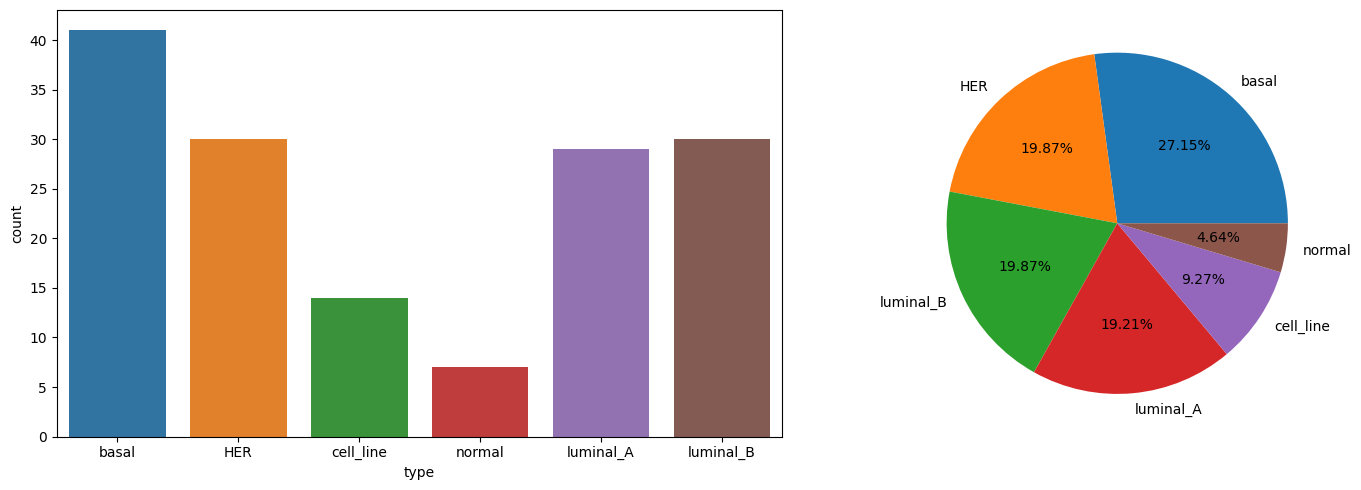

In [55]:
target  = "type"

val_counts = breast_data[target].value_counts()
print(val_counts, "\n\n")

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = breast_data[target])

plt.subplot(1, 2, 2)
plt.pie(val_counts, labels = val_counts.keys(), autopct = "%.2f%%")

plt.tight_layout()
plt.show()

In [62]:
#Encoding categorical feature(s) (Ordinal Encoding) for breast cancer 

class_map = {"normal": 0, "cell_line": 1, "luminal_A": 2, "luminal_B": 3, "HER": 4, "basal": 5}
class_map_reverse = {m : n for m, n in zip(class_map.values(), class_map.keys())}

encoder = category_encoders.OrdinalEncoder(cols = [target], mapping = [{"col": target, "mapping": class_map}])

breast_data['type'] = encoder.fit_transform(breast_data[target])

In [63]:
breast_data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,5,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,5,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,5,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,5,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,5,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


# Preprocessing Brain Cancer:

In [46]:
brain_data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [47]:
brain_data=brain_data.dropna(axis=0, how='any')
brain_data.shape

(130, 54677)

In [48]:
# check missing values :
brain_data.isnull().values.any()

False

In [49]:
brain_data.iloc[:, :10].describe()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,898.500000,12.276393,8.769583,7.722634,9.160209,4.842069,7.968388,6.800111,6.472452
std,37.671829,0.790160,0.673396,1.037339,0.615369,0.922003,0.630260,0.537431,0.659847
min,834.000000,10.156207,6.627878,6.222515,8.044421,3.682762,6.560920,5.910571,5.515079
25%,866.250000,11.679721,8.378760,7.007678,8.595505,4.207043,7.533713,6.389605,5.935051
50%,898.500000,12.502518,8.786242,7.521674,9.194487,4.462729,7.915062,6.654785,6.401447
75%,930.750000,12.883374,9.211098,8.249157,9.707397,5.276685,8.385912,7.143818,6.985782
max,963.000000,13.655639,10.716003,12.054143,10.407136,7.404503,10.164655,8.110006,8.812959


In [50]:
brain_data.groupby("type").count()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
type,,,,,,,,,,,,,,,,,,,,,
ependymoma,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
glioblastoma,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
medulloblastoma,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
normal,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
pilocytic_astrocytoma,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15


type
ependymoma               46
glioblastoma             34
medulloblastoma          22
pilocytic_astrocytoma    15
normal                   13
Name: count, dtype: int64 




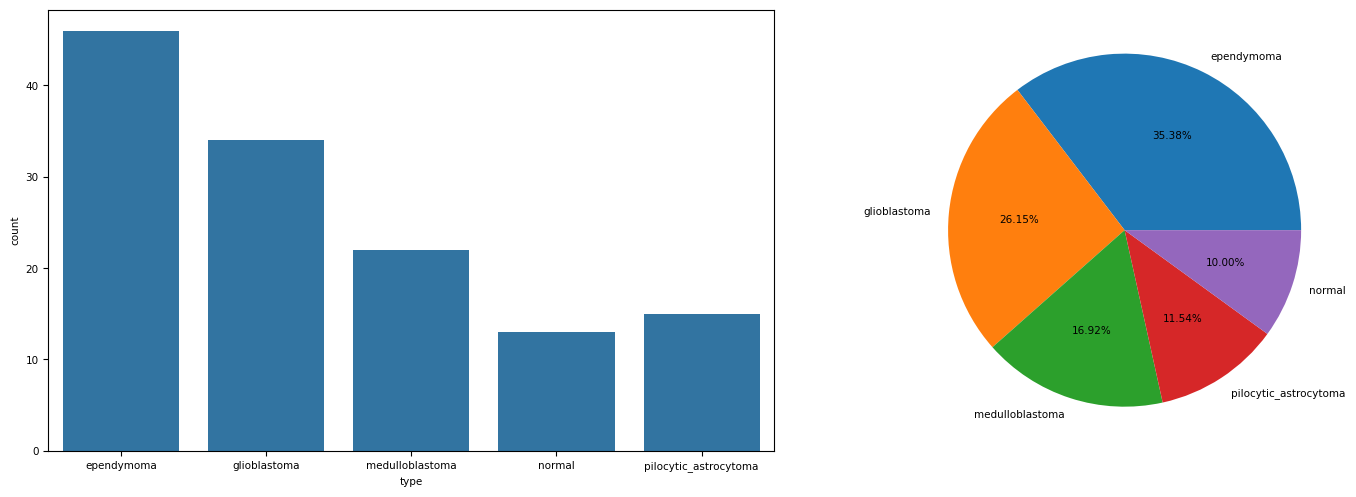

In [51]:
target  = "type"

val_counts = brain_data[target].value_counts()
print(val_counts, "\n\n")

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = brain_data[target])

plt.subplot(1, 2, 2)
plt.pie(val_counts, labels = val_counts.keys(), autopct = "%.2f%%")

plt.tight_layout()
plt.show()

In [52]:
#Encoding categorical feature(s) (Ordinal Encoding) for brain cancer 

from category_encoders import OrdinalEncoder

# Assuming brain_data is a pandas DataFrame containing your dataset
target = 'type'  # Replace with the actual target column name if different

# Define the class mapping
class_map = {
    "normal": 0, 
    "ependymoma": 1, 
    "glioblastoma": 2, 
    "medulloblastoma": 3, 
    "pilocytic_astrocytoma": 4
}

# Reverse mapping if needed later
class_map_reverse = {v: k for k, v in class_map.items()}

# Ordinal encoding
encoder = OrdinalEncoder(cols=[target], mapping=[{"col": target, "mapping": class_map}])

# Apply the encoder to the target column
brain_data[target] = encoder.fit_transform(brain_data[target])

In [53]:
brain_data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,1,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,1,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,1,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,1,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,1,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


# Normalization & Feature selcetion with t-statistik

## change dataset here: 

In [54]:
# Separate features (gene expression values) and target variable (sample type)
#X = breast_data.drop(['samples', 'type'], axis=1)
#y = breast_data['type']
#data =breast_data


X = brain_data.drop(['samples', 'type'], axis=1)
y = brain_data['type']
data=brain_data

In [55]:
print(X.shape, y.shape)


(130, 54675) (130,)


In [56]:
# Normalize gene expression data using Z-score normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [57]:
X_normalized

array([[ 0.28173373, -1.73630444, -0.8145423 , ...,  0.11359375,
        -0.69654765,  0.60833125],
       [ 1.00498979, -1.1501069 , -0.49698782, ..., -0.76331585,
        -1.23104142, -0.74087848],
       [ 1.00593412, -0.29205229,  0.89520246, ..., -0.59121918,
        -0.40249803,  0.18500941],
       ...,
       [ 0.54705896,  0.03896483,  0.04812085, ..., -0.00320234,
         0.85464601,  1.05199918],
       [ 0.51860218, -0.70907044, -0.47849434, ...,  1.21869065,
         0.23538466, -0.10464248],
       [ 0.15414353,  0.11022798,  1.06689351, ..., -0.13047352,
         2.44050512,  0.37263792]])

In [22]:
# Perform t-test for feature selection
t_scores, p_values = ttest_ind(X_normalized, y, axis=1)

# Select top-m genes with the largest T-statistic
m = 1000 # Number of top genes to select
selected_genes_indices = (-abs(t_scores)).argsort()[:m]

selected_features = X.columns[selected_genes_indices]
# Filter dataset to include only selected features
X_selected = X_normalized[:, selected_genes_indices]#X[selected_features]

In [23]:
X_selected

array([[ 0.22488861, -0.8145423 , -1.77196168, ...,  0.6162481 ,
        -0.68937575, -0.83777684],
       [-0.31878354, -0.49698782, -1.80493086, ...,  2.09804647,
        -1.15599229,  2.06777844],
       [ 0.41870071,  0.89520246, -0.76487699, ..., -0.48891102,
        -0.04909101,  0.40169414],
       ...,
       [ 0.26339423,  0.04812085,  1.25334605, ..., -0.22411482,
        -0.30271359, -1.02989763],
       [-1.2769685 , -0.47849434,  0.38617088, ..., -0.5809588 ,
         0.15210675,  0.09033614],
       [-1.04433296,  1.06689351,  0.84360692, ..., -1.62394984,
        -0.42662994, -0.47120069]])

In [24]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

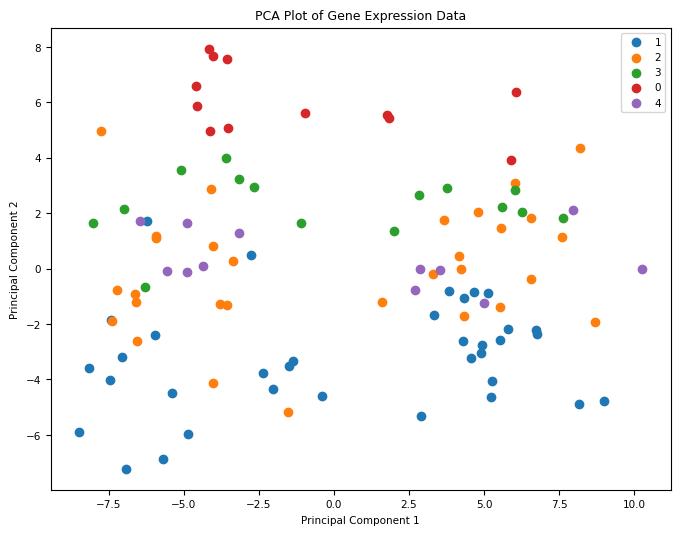

In [25]:
# Visualization (example: PCA plot)
# Note: Visualization depends on the dimensionality reduction technique used
# For simplicity, let's assume PCA here
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
for target in data['type'].unique():
    plt.scatter(X_pca[y_train == target, 0], X_pca[y_train == target, 1], label=target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Gene Expression Data')
plt.legend()
plt.savefig("pca_brain.png")
plt.show()

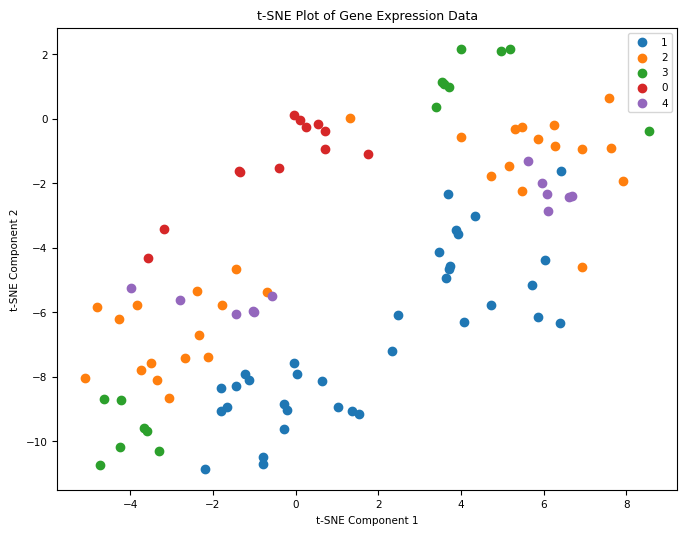

In [26]:
# Visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(8, 6))
for target in data['type'].unique():
    plt.scatter(X_tsne[y_train == target, 0], X_tsne[y_train == target, 1], label=target)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Plot of Gene Expression Data')
plt.legend()
plt.savefig("tsne_brain.png")
plt.show()

In [27]:
# # Visualization using Self-Organizing Feature Maps (SOFM)
# som = minisom.MiniSom(10, 10, X_normalized.shape[1], sigma=1.0, learning_rate=0.5)
# som.train_batch(X_normalized, 1000, verbose=True)

# plt.figure(figsize=(8, 6))
# for target in data['type'].unique():
#     plt.scatter(X_normalized[y == target, 0], X_normalized[y == target, 1], label=target)
# plt.xlabel('SOFM Component 1')
# plt.ylabel('SOFM Component 2')
# plt.title('SOFM Plot of Gene Expression Data')
# plt.legend()
# plt.savefig("sofm.png")
# plt.show()

# Classifers: 

In [28]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Train K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.92      1.00      0.96        11
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7
           4       0.67      0.67      0.67         3

    accuracy                           0.92        26
   macro avg       0.92      0.88      0.90        26
weighted avg       0.93      0.92      0.92        26



In [30]:
# Train Support Vector Machines
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.91      0.95        11
           2       0.67      1.00      0.80         4
           3       1.00      1.00      1.00         7
           4       1.00      0.67      0.80         3

    accuracy                           0.92        26
   macro avg       0.93      0.92      0.91        26
weighted avg       0.95      0.92      0.93        26



In [31]:
# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.91      0.95        11
           2       0.67      1.00      0.80         4
           3       1.00      1.00      1.00         7
           4       1.00      0.67      0.80         3

    accuracy                           0.92        26
   macro avg       0.93      0.92      0.91        26
weighted avg       0.95      0.92      0.93        26



In [32]:
# # Define fitness function
# def fitness_function(selected_features):
#     # Convert selected_features to 1D array
#     selected_features = np.ravel(selected_features)
    
#     # Train classifier using selected features
#     X_selected = X.iloc[:, selected_features]
#     X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
#     knn = KNeighborsClassifier(n_neighbors=5)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     return -accuracy  # Minimize 1-accuracy (i.e., maximize accuracy)

In [33]:
# Define fitness function
def fitness_function(particle):
    # Extract selected features == 1
    particle = np.clip(particle, 0, 1)
    selected_features_indices = np.nonzero(particle == 1)[0]
    
    # Train classifier using selected features
    if selected_features_indices.size == 0:
        return 0
    X_selected = X_normalized[:, selected_features_indices]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    # rf = RandomForestClassifier(n_estimators=100, random_state=42)
    # rf.fit(X_train, y_train)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy  # Minimize 1-accuracy (i.e., maximize accuracy)

# PySwarms

In [34]:
# # Define PSO parameters
# num_particles = 10
# num_features = X.shape[1]
# options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# # Initialize PSO optimizer
# optimizer = ps.single.GlobalBestPSO(n_particles=num_particles, dimensions=num_features, options=options)

# # Perform PSO optimization
# best_position, _ = optimizer.optimize(fitness_function, iters=100)

# # Extract selected features
# selected_features_indices = np.where(best_position == 1)[0]
# selected_features = X.columns[selected_features_indices]

# print("Selected Features:", selected_features)

# Scikit-opt

## PSO

Swarming...


Iter: 50 | Best fit: [-0.96153846] at [0.01813021 0.63772912 0.25637946 ... 0.51592578 0.44182977 0.        ]: 100%|██████████| 50/50 [02:18<00:00,  2.77s/it]


best_x is  [0.01813021 0.63772912 0.25637946 ... 0.51592578 0.44182977 0.        ] best_y is [-0.96153846]


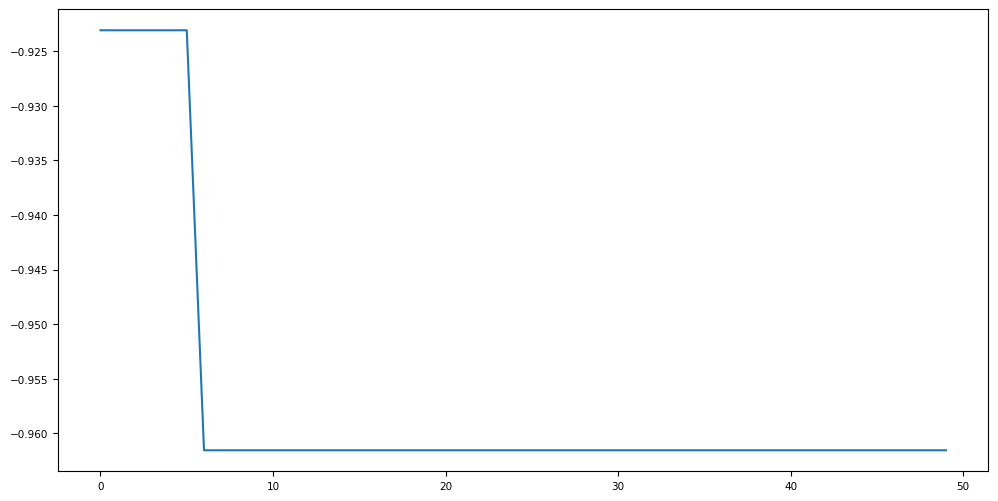

In [35]:
# Do PSO
from sko.PSO import PSO

# parameters: n_dim, pop, max_iter, w, c1, c2
n_dim = X_normalized.shape[1]
pop = 50
max_iter = 50
lb = [0] * n_dim
ub = [1] * n_dim
w = 0.65
c1 = 2.0
c2 = 2.0

# initialize PSO
pso = PSO(func=fitness_function, n_dim=n_dim, pop=pop, max_iter=max_iter, lb=lb, ub=ub, w=w, c1=c1, c2=c2, n_processes=os.cpu_count())

# run the PSO
pso.run()
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)

# Plot the result
plt.plot(pso.gbest_y_hist)
plt.show()

In [36]:
# Extract selected features == 1
selected_features_indices = np.nonzero(pso.gbest_x == 1)[0]
selected_features = X.columns[selected_features_indices]

print("Selected Features:", selected_features)
print("Number of Selected Features:", len(selected_features), "out of", X.shape[1], "features (", np.round(len(selected_features) / X.shape[1] * 100, 2), "%)")

Selected Features: Index(['1487_at', '1552258_at', '1552261_at', '1552272_a_at', '1552288_at',
       '1552289_a_at', '1552299_at', '1552303_a_at', '1552310_at',
       '1552318_at',
       ...
       '66053_at', '91684_g_at', 'AFFX-DapX-3_at', 'AFFX-HSAC07/X00351_M_at',
       'AFFX-LysX-M_at', 'AFFX-M27830_5_at', 'AFFX-PheX-M_at',
       'AFFX-r2-Bs-dap-3_at', 'AFFX-r2-Bs-phe-5_at', 'AFFX-r2-Ec-bioB-5_at'],
      dtype='object', length=8086)
Number of Selected Features: 8086 out of 54675 features ( 14.79 %)


In [37]:
# Train K-Nearest Neighbors classifier using selected features
X_selected = X_normalized[:, selected_features_indices]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Plot accuracy
print("Accuracy of KNN classifier using selected features:", accuracy)

Accuracy of KNN classifier using selected features: 0.9615384615384616


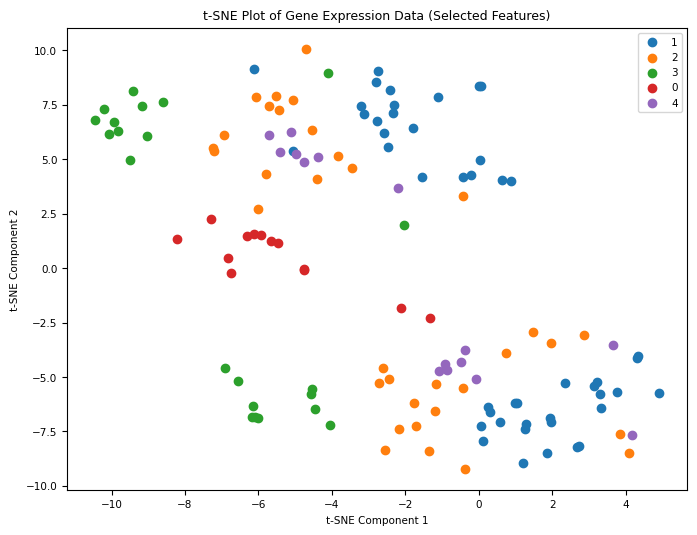

In [38]:
# T-sne plot with selected features
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_selected)

plt.figure(figsize=(8, 6))
for target in data['type'].unique():
    plt.scatter(X_tsne[y == target, 0], X_tsne[y == target, 1], label=target)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Plot of Gene Expression Data (Selected Features)')
plt.legend()
plt.savefig("tsne_selected_pso_brain.png")
plt.show()

## APSO

In [39]:
# # do APSO
# # parameters: n_dim, pop, max_iter, w, c1, c2
# n_dim = X_normalized.shape[1]
# pop = 30
# max_iter = 100
# lb = [0] * n_dim
# ub = [1] * n_dim
# w = 0.65
# c1 = 1.7
# c2 = 1.7

# particles = np.random.uniform(0, 1, (pop, X_normalized.shape[1]))
# velocities = (np.random.random((pop, X_normalized.shape[1])) - 0.5) / 10

# pso_1 = APSO(n_dim = n_dim, particles = particles.copy(), velocities = velocities.copy(), fitness_function = fitness_function, w = w, c_1 = c1, c_2 = c2, lb = lb, ub = ub, max_iter = max_iter, auto_coef = True, n_processes = os.cpu_count())
# pso_2 = APSO(n_dim = n_dim, particles=particles.copy(), velocities=velocities.copy(), fitness_function=fitness_function, w=0.9, c_1=4, c_2=0, max_iter=10, auto_coef=True, n_processes=os.cpu_count())
# pso_3 = APSO(n_dim = n_dim, particles=particles.copy(), velocities=velocities.copy(), fitness_function=fitness_function, w=0.9, c_1=0, c_2=4, max_iter=10, auto_coef=True, n_processes=os.cpu_count())

# # run pso
# while pso_1.next():
#     pso_2.next()
#     pso_3.next()

In [40]:
# # print the best results
# print('PSO 1 best_x is ', pso_1.g_best, 'best_y is', -pso_1.g_best_value*100)
# print('PSO 2 best_x is ', pso_2.g_best, 'best_y is', -pso_2.g_best_value*100)
# print('PSO 3 best_x is ', pso_3.g_best, 'best_y is', -pso_3.g_best_value*100)

In [41]:
# # Extract selected features > 0.9
# selected_features_indices = np.nonzero(pso_1.g_best >= 1)[0]
# print(selected_features_indices)
# selected_features = X.columns[selected_features_indices]

# print("Selected Features:", selected_features)
# print("Number of Selected Features:", len(selected_features), "out of", X.shape[1], "features (", np.round(len(selected_features) / X.shape[1] * 100, 2), "%)")

In [42]:
# # Train K-Nearest Neighbors classifier using selected features
# X_selected = X_normalized[:, selected_features_indices]
# X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# # Plot accuracy
# print("Accuracy of KNN classifier using selected features:", accuracy)

## AFSA

In [58]:
from sko.AFSA import AFSA

# hyperparameters: n_dim, size_pop, max_iter, max_try_num, step, visual, q, delta
n_dim = X_normalized.shape[1]
size_pop = 50
max_iter = 50
lb = [0] * n_dim
ub = [1] * n_dim
max_try_num = 10
step = 0.5
visual = 0.3
q = 0.98
delta = 0.7

# init and run AFSA
afsa = AFSA(func=fitness_function, n_dim=n_dim, size_pop=size_pop, max_iter=max_iter, lb=lb, ub=ub, max_try_num=max_try_num, step=step, visual=visual, q=q, delta=delta, n_processes = os.cpu_count())
best_x, best_y = afsa.run()
print(best_x, best_y)

# Plot the result
plt.plot(afsa.best_y_hist)
plt.show()

Fish are swarming...


KeyboardInterrupt: 

In [ ]:
# Extract selected features == 1
selected_features_indices = np.nonzero(best_x == 1)[0]
selected_features = X.columns[selected_features_indices]

print("Selected Features:", selected_features)
print("Number of Selected Features:", len(selected_features), "out of", X.shape[1], "features (", np.round(len(selected_features) / X.shape[1] * 100, 2), "%)")

Selected Features: Index(['1552258_at', '1552390_a_at', '1552391_at', '1552459_a_at',
       '1552486_s_at', '1552501_a_at', '1552502_s_at', '1552506_at',
       '1552552_s_at', '1552610_a_at',
       ...
       '42361_g_at', '44822_s_at', '48659_at', '49452_at', '53968_at',
       '56197_at', '56829_at', '57082_at', 'AFFX-r2-Ec-bioC-3_at',
       'AFFX-r2-Ec-bioD-3_at'],
      dtype='object', length=2501)
Number of Selected Features: 2501 out of 54675 features ( 4.57 %)


In [ ]:
# Train K-Nearest Neighbors classifier using selected features
X_selected = X.iloc[:, selected_features_indices]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Plot accuracy
print("Accuracy of KNN classifier using selected features:", accuracy)

Accuracy of KNN classifier using selected features: 0.9230769230769231


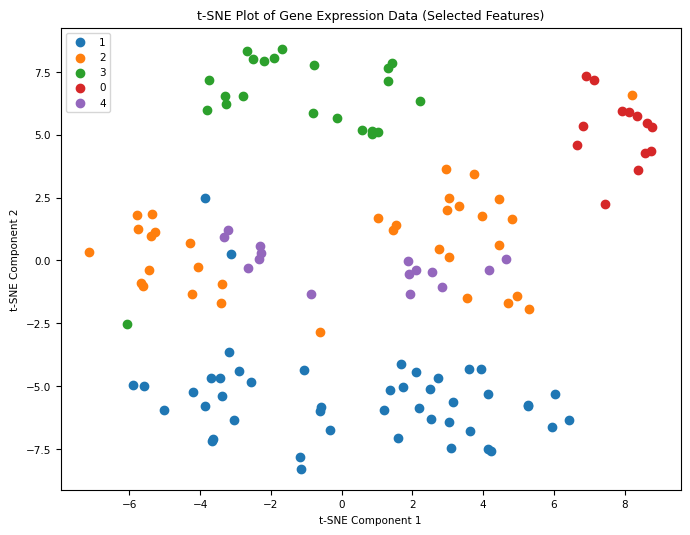

In [ ]:
# T-sne plot with selected features
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_selected)

plt.figure(figsize=(8, 6))
for target in data['type'].unique():
    plt.scatter(X_tsne[y == target, 0], X_tsne[y == target, 1], label=target)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Plot of Gene Expression Data (Selected Features)')
plt.legend()
plt.savefig("tsne_selected_afsa_brain.png")
plt.show()